<a href="https://colab.research.google.com/github/VettoriKev/Machine-Learning/blob/main/Vettori_Tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 4.4 
##→  Winsconsin Breast Cancer dataset
---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/ProjectBCD/data/data.csv'
df = pd.read_csv(url, index_col=0)
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [ ]:
## Remplazamos la columna que corresponde al diagnostico por "1" si el tumor es benigno ('B') y a "0" si es maligno ('M')

df['diagnosis'] = np.where(df['diagnosis']=='B', 1, 0)

df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


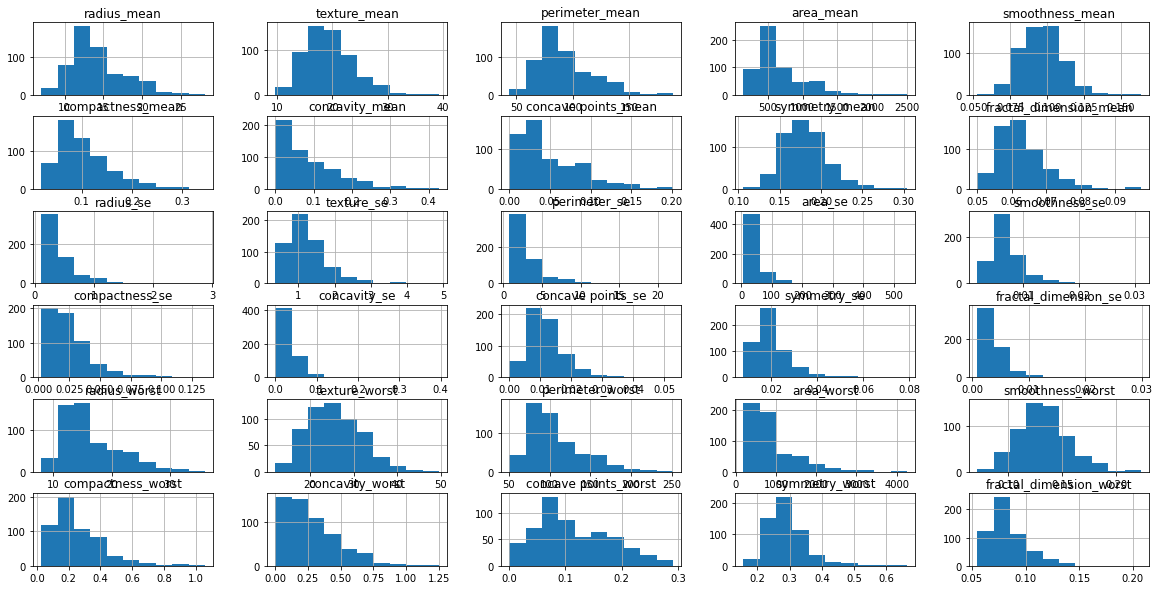

In [ ]:
dfx = df.drop(['diagnosis','Unnamed: 32'],1)
dfx.hist(figsize=(20,10))
plt.show()

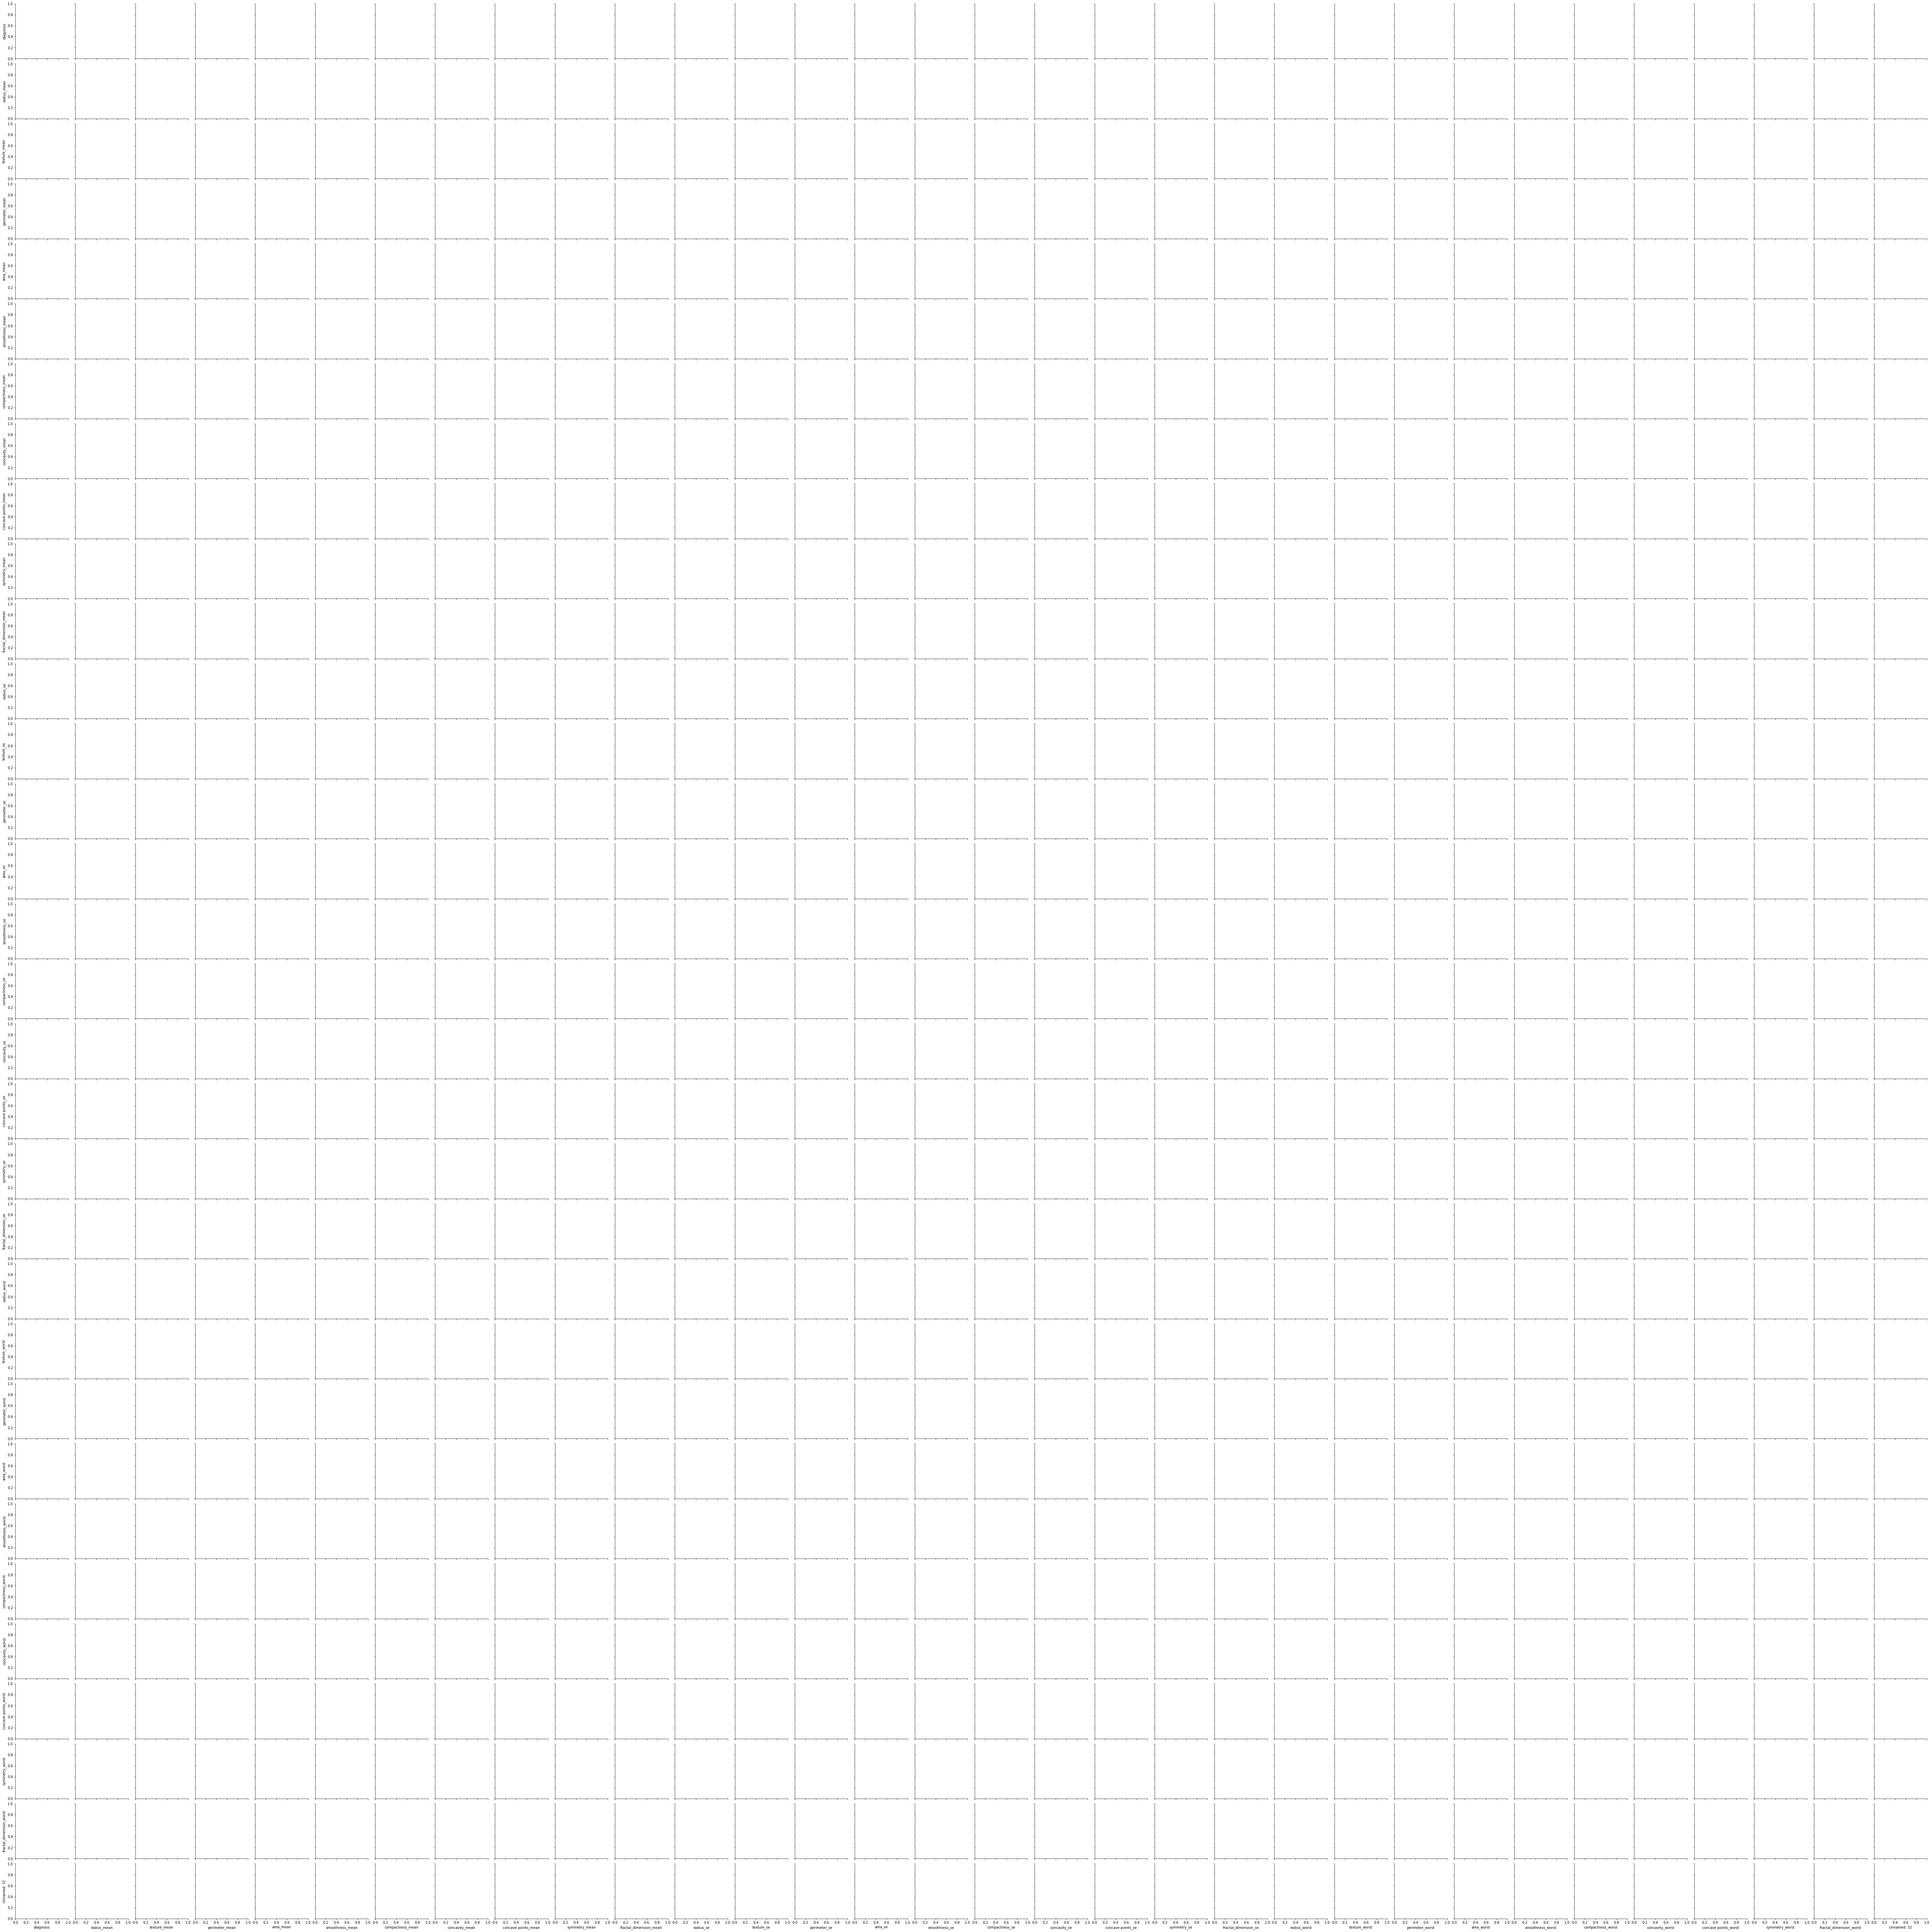

In [ ]:
sns.pairplot(df())

###Viendo los datos disponibles, no tengo los conocimientos para elegir que datos tienen mas relevancia o si algunos no tienen tanto peso. Asi que opto utilizar todas las carcateristicas fisicas de los tumores.
---
### Empezamos dividiendo el dataset para entrenamiento de todos los clasificadores, asi todos son probados bajo el mismo conjunto de datos para una mayor comparación. Probablemente con distintas divisiones podriamos ver distintos resultados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
Sc = StandardScaler()

t_sz = 0.2

x = df.drop(['diagnosis','Unnamed: 32'],1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=t_sz, random_state = 0)

# Estandarizamos los valores
x_train = Sc.fit_transform(x_train)
x_test = Sc.fit_transform(x_test)

### En un principio pense entrenar los algoritmos utilizando "GridSearchCV()", pero como tarda bastante tiempo debido a que no se aun optimizar dicho algoritmo, crei que utilizando los parametros por defecto de cada clasificador , seria una forma justa de compararlos.
---

## Primero aplicamos Regresion Logistica
### Por el conjunto de datos y su naturaleza supusimos que los calsificadores orientados a la distribución numerica o espacial serian buenos candidatos para para la predicción de este dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2', C = 1.0, class_weight = None, max_iter = 100)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 95.61
Recall: 97.01
Precision: 95.59
F1 score: 96.3 

[[44  3]
 [ 2 65]]


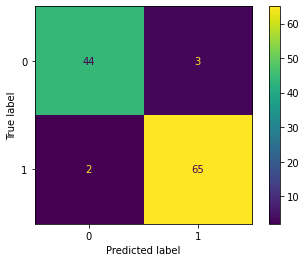

In [ ]:
y_pred_lr = lr.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred_lr)*100, 2))
print('Recall:', np.round(recall_score(y_test, y_pred_lr)*100, 2))
print('Precision:', np.round(precision_score(y_test, y_pred_lr)*100, 2))
print('F1 score:', np.round(f1_score(y_test, y_pred_lr)*100, 2), '\n')

cm = confusion_matrix(y_test,y_pred_lr)
print(cm)

plot_confusion_matrix(lr, x_test, y_test)  
plt.show()


---
----
## Ahora SVC (Support Vector Classification) 

In [ ]:
from sklearn.svm import SVC 

svc = SVC(C=1.0, kernel = 'rbf', class_weight = None , max_iter = - 1)
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy: 98.25
Recall: 100.0
Precision: 97.1
F1 score: 98.53 

[[45  2]
 [ 0 67]]


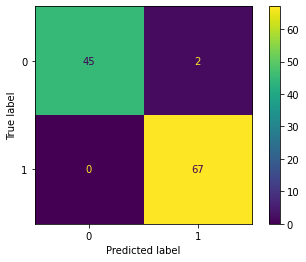

In [ ]:
y_pred_svc = svc.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred_svc)*100, 2))
print('Recall:', np.round(recall_score(y_test, y_pred_svc)*100, 2))
print('Precision:', np.round(precision_score(y_test, y_pred_svc)*100, 2))
print('F1 score:', np.round(f1_score(y_test, y_pred_svc)*100, 2), '\n')

cm = confusion_matrix(y_test,y_pred_svc)
print(cm)

plot_confusion_matrix(svc, x_test, y_test)  
plt.show()


---
---
## Perceptron


In [ ]:
from sklearn.linear_model import Perceptron

pcn = Perceptron(penalty = None, max_iter = 1000, class_weight = None)
pcn.fit(x_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy: 94.74
Recall: 97.01
Precision: 94.2
F1 score: 95.59 

[[43  4]
 [ 2 65]]


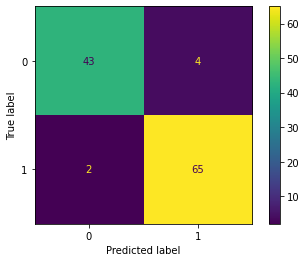

In [ ]:
y_pred_pcn = pcn.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred_pcn)*100, 2))
print('Recall:', np.round(recall_score(y_test, y_pred_pcn)*100, 2))
print('Precision:', np.round(precision_score(y_test, y_pred_pcn)*100, 2))
print('F1 score:', np.round(f1_score(y_test, y_pred_pcn)*100, 2), '\n')

cm = confusion_matrix(y_test,y_pred_pcn)
print(cm)

plot_confusion_matrix(pcn, x_test, y_test)  
plt.show()

---
## Arbol de decisión
### Probamos resultados con clasificador de arbol de decisión, porque es un metodo que a priori intuitivamente no parece uno adecuado para este tipo de dataset, el cual no hay ciertos discriminantes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'gini', class_weight = None, min_samples_split = 2)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Accuracy: 92.11
Recall: 94.03
Precision: 92.65
F1 score: 93.33 

[[42  5]
 [ 4 63]]


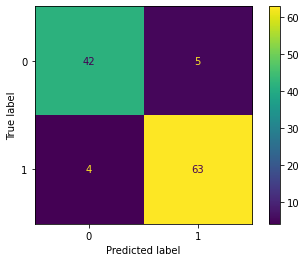

In [ ]:
y_pred_dtc = dtc.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred_dtc)*100, 2))
print('Recall:', np.round(recall_score(y_test, y_pred_dtc)*100, 2))
print('Precision:', np.round(precision_score(y_test, y_pred_dtc)*100, 2))
print('F1 score:', np.round(f1_score(y_test, y_pred_dtc)*100, 2), '\n')

cm = confusion_matrix(y_test,y_pred_dtc)
print(cm)

plot_confusion_matrix(dtc, x_test, y_test)  
plt.show()

---
### Conclusión
Si bien en este notebook no podemos poner en peso el tiempo que tarda en entrenar cada clasificador, si podemos observar que para una misma muestra de un dataset tenemos distintos resultados con los distintos clasificadores probado.
A priori vemos que la intuición fue correspondida, al ver que el clasificador menos efectivo fue el de abol de decisión. Aún asi tengo dudas de los resultados, ya que fueron extremadamente satisfactorios, con los parametros por defecto.